# Section: 1 - Importing Libraries

In [ ]:
# Name: Lata
# Project: Barclays: Problem Statement - Support Mail/BOT Prediction
# Dataset: https://www.kaggle.com/datasets/wcukierski/enron-email-dataset

In [1]:
# Importing necessary libraries for text processing and machine learning

import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /home/lata/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/lata/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#Section: 2 - Data Loading


In [4]:
# Install Kaggle API
!pip install kaggle

# Download the dataset
!kaggle datasets download -d wcukierski/enron-email-dataset

# Unzip the dataset
!unzip enron-email-dataset.zip -d enron

Defaulting to user installation because normal site-packages is not writeable
Dataset URL: https://www.kaggle.com/datasets/wcukierski/enron-email-dataset
License(s): copyright-authors
100%|████████████████████████████████████████| 358M/358M [54:17<00:00, 94.5kB/s]
100%|█████████████████████████████████████████| 358M/358M [54:17<00:00, 115kB/s]
Archive:  enron-email-dataset.zip
  inflating: enron/emails.csv        


In [7]:
# Load the dataset
df = pd.read_csv('/home/lata/Downloads/Support-Mail-BOT-Prediction/enron/emails.csv')

# Check the first few rows of the dataset
print(df.head())

# View the first few rows of the DataFrame
print(df.head())

# View a random sample of rows from the DataFrame
print(df.sample(5))



                       file                                            message
0     allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...
1    allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...
2   allen-p/_sent_mail/100.  Message-ID: <24216240.1075855687451.JavaMail.e...
3  allen-p/_sent_mail/1000.  Message-ID: <13505866.1075863688222.JavaMail.e...
4  allen-p/_sent_mail/1001.  Message-ID: <30922949.1075863688243.JavaMail.e...
                       file                                            message
0     allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...
1    allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...
2   allen-p/_sent_mail/100.  Message-ID: <24216240.1075855687451.JavaMail.e...
3  allen-p/_sent_mail/1000.  Message-ID: <13505866.1075863688222.JavaMail.e...
4  allen-p/_sent_mail/1001.  Message-ID: <30922949.1075863688243.JavaMail.e...
                                   file  \
191198   

### Exploring dataset Content

In [8]:
#Exploring data set

print(df['message'].head())
print(df['message'].iloc[0])  # Print the first message
print(df['message'].iloc[1])  # Print the second message
print(df['message'].iloc[2])  # Print the third message



0    Message-ID: <18782981.1075855378110.JavaMail.e...
1    Message-ID: <15464986.1075855378456.JavaMail.e...
2    Message-ID: <24216240.1075855687451.JavaMail.e...
3    Message-ID: <13505866.1075863688222.JavaMail.e...
4    Message-ID: <30922949.1075863688243.JavaMail.e...
Name: message, dtype: object
Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 
Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>
Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type:

### Reading Email body

In [9]:
# Extract email bodies from the 'message' column
email_bodies = df['message'].apply(lambda x: x.split('\n\n', 1)[-1])

# Print the first few email bodies to verify
print(email_bodies.head())


0                            Here is our forecast\n\n 
1    Traveling to have a business meeting takes the...
2                       test successful.  way to go!!!
3    Randy,\n\n Can you send me a schedule of the s...
4                  Let's shoot for Tuesday at 11:45.  
Name: message, dtype: object


### Data Cleaning

In [10]:
# Function to clean the email bodies
def clean_text(text):
    # Remove newline characters and extra whitespace
    text = text.replace('\n', ' ').strip()
    # Remove non-alphanumeric characters and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Apply the clean_text function to each email body
cleaned_email_bodies = email_bodies.apply(clean_text)

# Print the first few cleaned email bodies
print(cleaned_email_bodies.head())


0                                 Here is our forecast
1    Traveling to have a business meeting takes the...
2                           test successful  way to go
3    Randy   Can you send me a schedule of the sala...
4                       Lets shoot for Tuesday at 1145
Name: message, dtype: object


# Section: 3 - Categorizing Emails Based on Keywords

In [11]:
# Define a dictionary with categories as keys and lists of keywords (including regex patterns) as values

category_keywords = {
    'Resumes': [re.compile(r"(resume|CV)(.docx|.pdf)"), 'experience', 'skills', 'qualifications', 'cover letter', 'references', 'portfolio', 'rseume', r"my resume", r"my cv", 'cv', 'education'],
    'Applications': ['application', 'apply', 'job', 'position', 'hire', 'candidate', r"job title: (.*?)", r"location: (.*?)", 'interview', 'screening', 'assessment'],
    'Meetings': ['meeting', 'schedule', 'agenda', 'conference', 'call', 'appointment', 'minutes', 'location', 'time', r"brainstorming meeting", r"performance review", 'stakeholders', 'team'],
    'HR': ['HR', 'human resources', 'personnel', 'employee', 'training', 'benefits', 'payroll', 'compensation', 'performance review', 'health insurance', 'paid time off', 'grievance', 'disciplinary action', 'workforce', 'manpower', 'staffing', 'onboarding', 'termination'],
    'Spam': ['offer', 'free', 'discount', 'sale', 'limited time', 'exclusive', 'urgent', 'confidential', 'account verification', 'win a prize', 'money back guarantee', '.exe', '.zip', 'click here to win', 'unsubscribe', 'too good to be true', 'act now', '1000', '1000000', 'money']
}

#label email
def label_category(email_body):
    """
    Labels an email based on keywords in the category_keywords dictionary.

    Args:
        email_body (str): The body text of the email.

    Returns:
        str: The category label or 'Uncategorized' if no match is found.
    """
    email_body_lower = email_body.lower()
    for category, keywords in category_keywords.items():
        for keyword in keywords:
            if isinstance(keyword, str):  # Check if keyword is a string
                if keyword.lower() in email_body_lower:
                    return category
            else:  # Keyword is a compiled regular expression
                if re.search(keyword, email_body_lower):
                    return category
    return 'Uncategorized'


# Apply the function to label emails
df['category'] = email_bodies.apply(label_category)


# Display the counts of emails in each category
print("Category Distribution:")
print(df['category'].value_counts())


Category Distribution:
category
Meetings         198060
Uncategorized    152552
Applications      62362
HR                41268
Resumes           39814
Spam              23345
Name: count, dtype: int64


### Checking if Emails are lebelled correctly or not

In [12]:
# Group the DataFrame by the "category" column and select the first 5 rows of each group
sample_data = df.groupby('category').head(2)

# Display the sample data
print(sample_data)


# Display the sample data including the message content
for index, row in sample_data.iterrows():
    print("Category:", row['category'])
    print("Message:\n", row['message'])
    print("\n")



                        file  \
0      allen-p/_sent_mail/1.   
1     allen-p/_sent_mail/10.   
2    allen-p/_sent_mail/100.   
3   allen-p/_sent_mail/1000.   
12   allen-p/_sent_mail/105.   
13   allen-p/_sent_mail/106.   
25   allen-p/_sent_mail/117.   
26   allen-p/_sent_mail/118.   
58   allen-p/_sent_mail/147.   
80   allen-p/_sent_mail/167.   
94    allen-p/_sent_mail/18.   
95   allen-p/_sent_mail/180.   

                                              message       category  
0   Message-ID: <18782981.1075855378110.JavaMail.e...  Uncategorized  
1   Message-ID: <15464986.1075855378456.JavaMail.e...       Meetings  
2   Message-ID: <24216240.1075855687451.JavaMail.e...  Uncategorized  
3   Message-ID: <13505866.1075863688222.JavaMail.e...       Meetings  
12  Message-ID: <13116875.1075855687561.JavaMail.e...   Applications  
13  Message-ID: <2707340.1075855687584.JavaMail.ev...   Applications  
25  Message-ID: <19034252.1075855687825.JavaMail.e...        Resumes  
26  Message-ID:

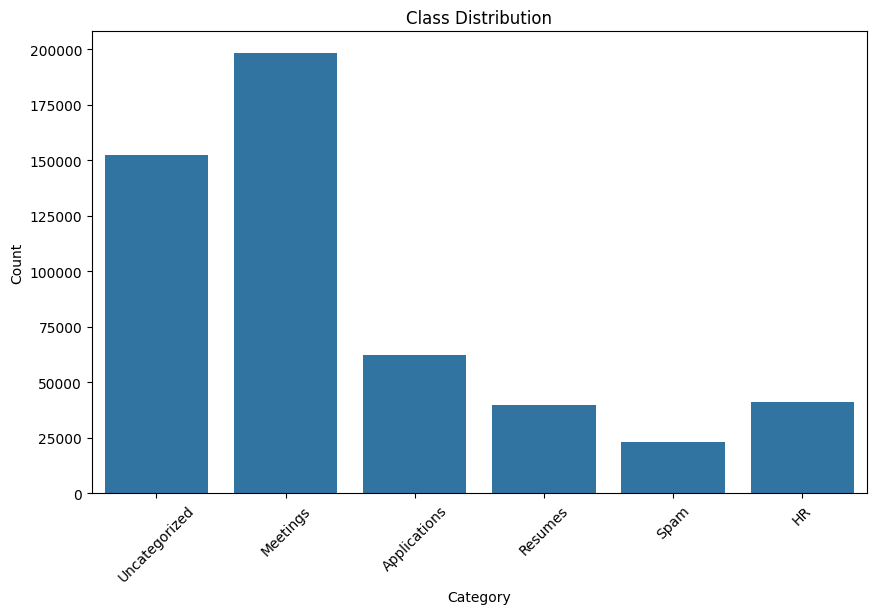

In [13]:
# Visualize the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df)
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Section: 4- Splitting Data, Vectorizing Text, and Training a Classification Model


/home/lata/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


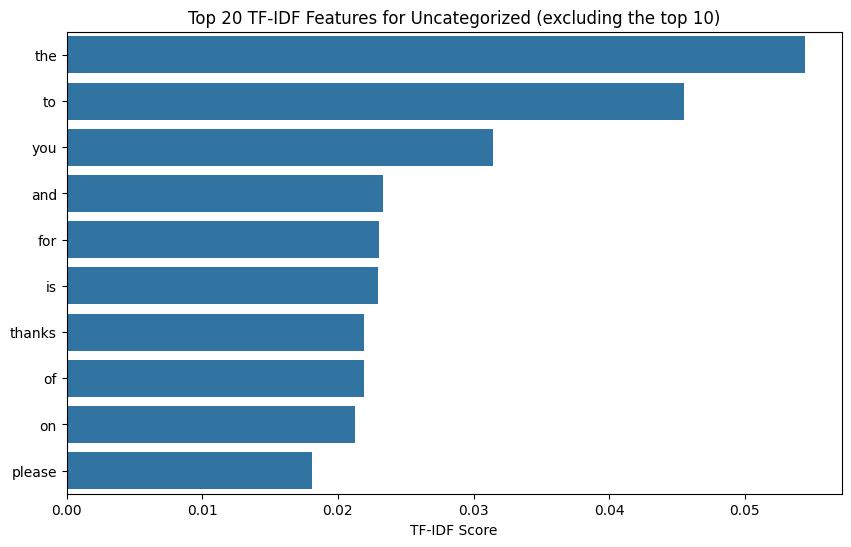

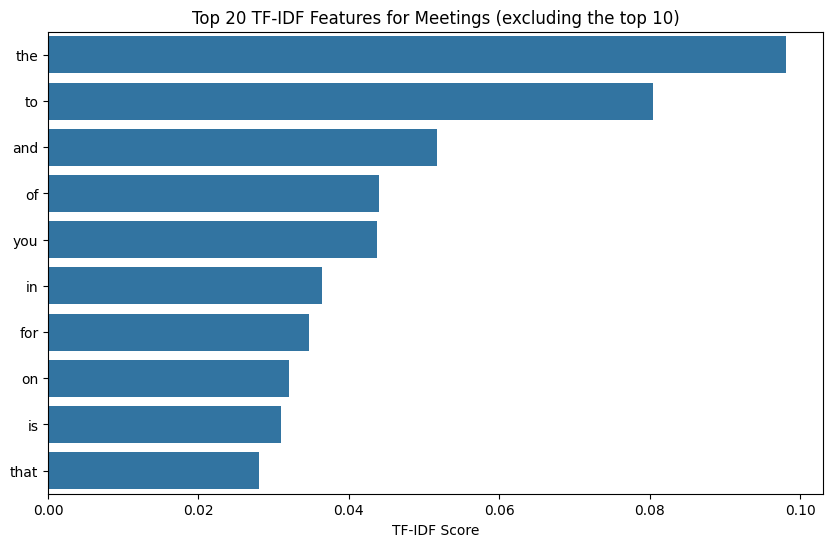

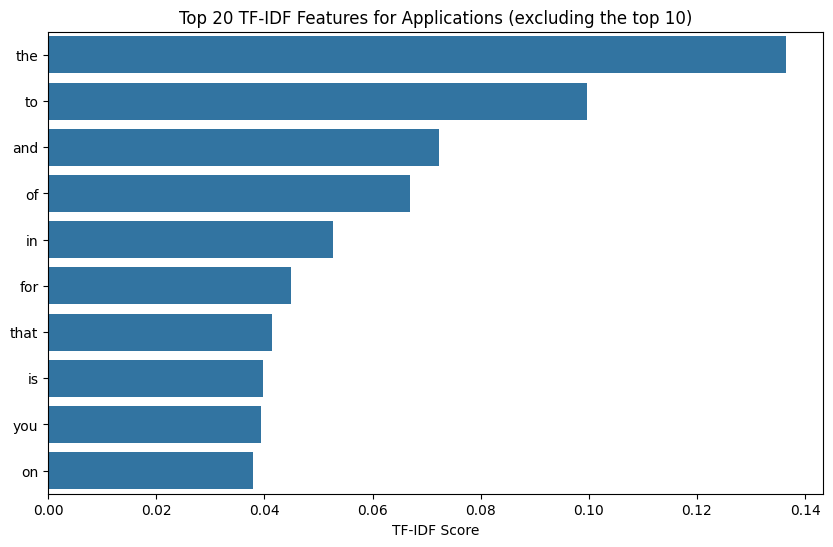

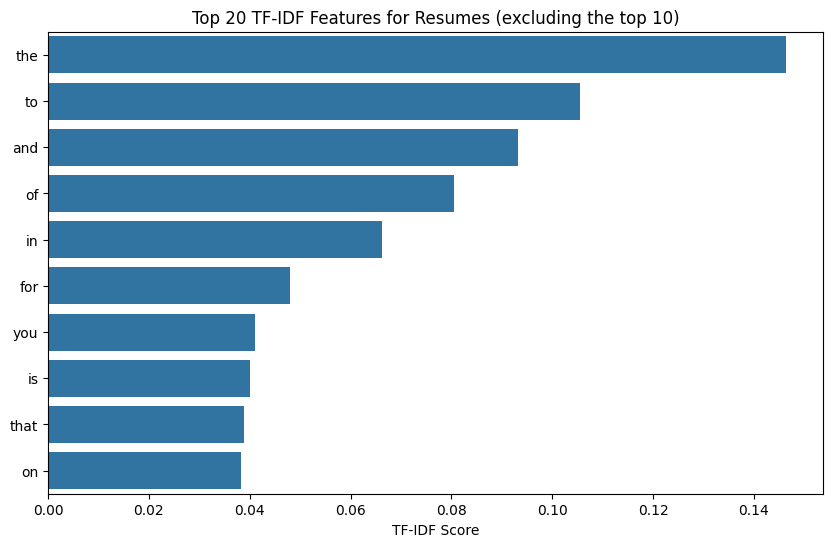

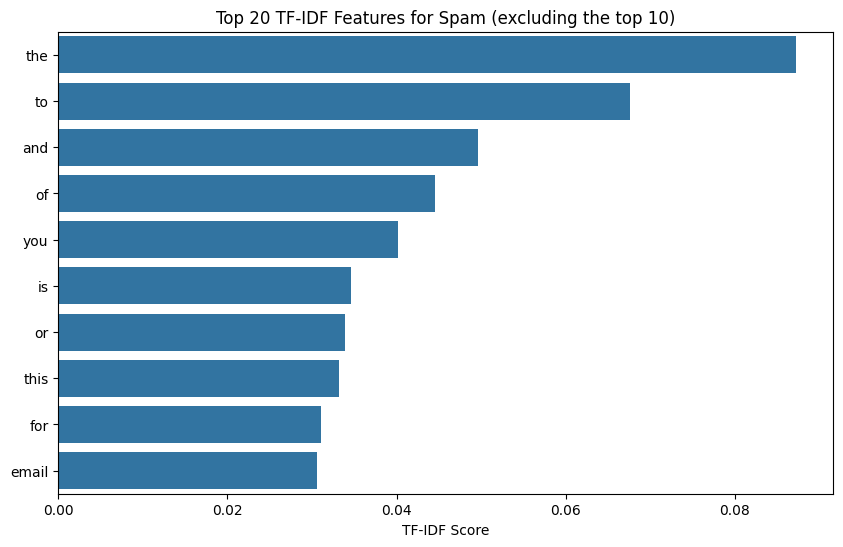

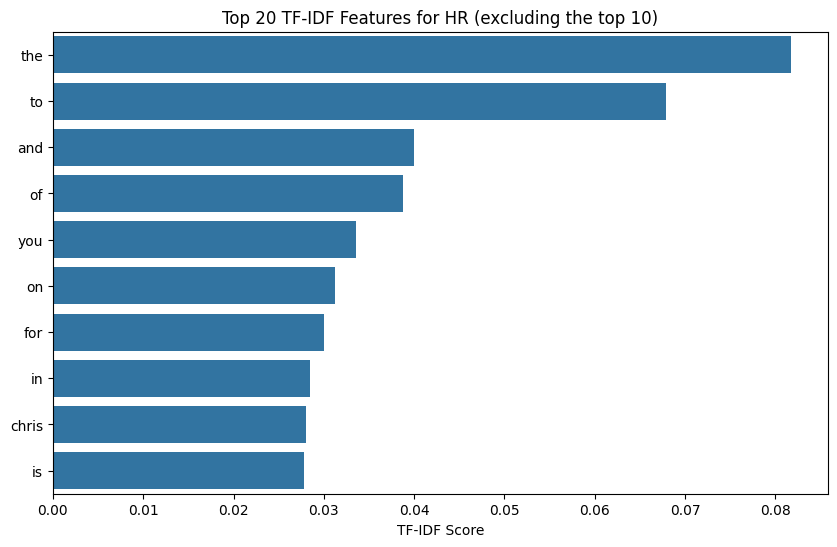

In [14]:
# Import the necessary library
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cleaned_email_bodies, df['category'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a classification model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train_vec, y_train)

from collections import Counter

# Visualize the top TF-IDF features for each category
def plot_top_tfidf_features(X, y, vectorizer, category, top_n=20, skip_n=10):
    indices = (y == category)
    X_cat = X[indices]
    y_cat = y[indices]
    tfidf_means = X_cat.mean(axis=0).A1
    features = vectorizer.get_feature_names_out()
    
    # Take the top (N + skip_n) indices and then exclude the first skip_n of those
    top_indices = tfidf_means.argsort()[-(top_n + skip_n):]
    selected_indices = top_indices[:-(skip_n + 1):-1]  # This will give you the last 'top_n' elements, excluding the first 'skip_n'
    
    top_features = [features[i] for i in selected_indices]
    top_scores = tfidf_means[selected_indices]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_scores, y=top_features)
    plt.title(f'Top {top_n} TF-IDF Features for {category} (excluding the top {skip_n})')
    plt.xlabel('TF-IDF Score')
    plt.show()


for category in df['category'].unique():
    plot_top_tfidf_features(X_train_vec, y_train, vectorizer, category)



### Evaluating the Model

In [15]:
# Evaluate the model
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.8858147872556315
Classification Report:
               precision    recall  f1-score   support

 Applications       0.90      0.79      0.84     12382
           HR       0.88      0.70      0.78      8120
     Meetings       0.90      0.94      0.92     39525
      Resumes       0.85      0.74      0.79      8027
         Spam       0.83      0.65      0.73      4769
Uncategorized       0.88      0.99      0.93     30658

     accuracy                           0.89    103481
    macro avg       0.87      0.80      0.83    103481
 weighted avg       0.89      0.89      0.88    103481



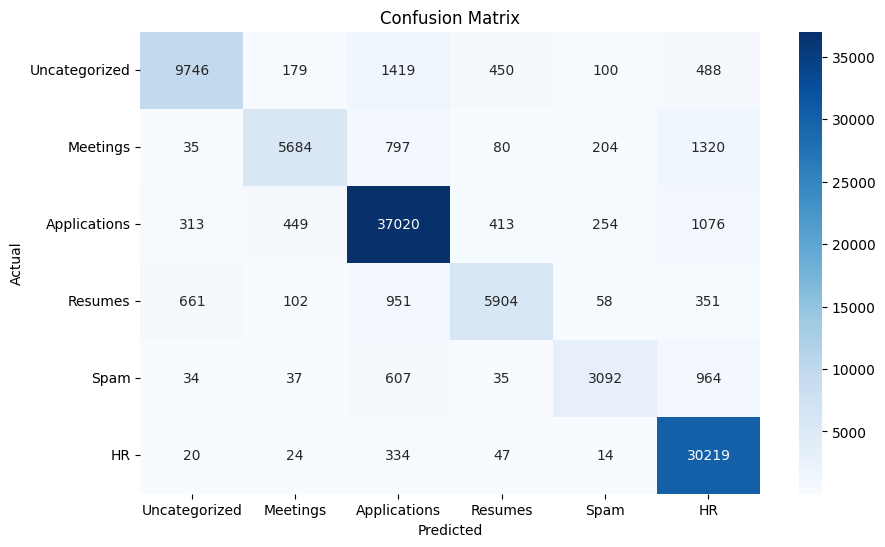

In [14]:
# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=df['category'].unique(), yticklabels=df['category'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Save the Model


In [34]:
# Save the trained model if needed
import joblib

joblib.dump(model, 'email_classification_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']